<a href="https://colab.research.google.com/github/avinashkrishnan2020/Final-capstone-project/blob/master/Battle_Of_Neighborhoods_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Please open in Google collab or any platform to view the folium Maps.]
[Click on the Google collab icon to view it using this platform]

#**Battle of Neighborhoods**

#Introduction/Business Problem

New York is one of the most sought after tourist destinations. The number of visitors in this city keeps increasing year over year. The city is crowded with venues no one ever wants to miss out on. While there are some very well known attractions such as the Statue of Liberty, Central Park and so on, the city is also known for its broadway shows as well as the exquisite dining and shopping experience.

Tourists who visit New York are already burdened with a hefty price tag on their travel tickets and an expensive stay only adds to their worries. This leaves them a very narrow opportunity to splurge their expense on shopping or even fine dining at any one of the well known restaurants.

One cannot expect to finish exploring the city in 2-3 days. It won't justify the amount spent on the travel tickets alone.
A week will suffice to cover most of New York. However, staying in a cramped up hotel room for a whole week, and paying a fortune for it is pretty unwelcoming.
Tourists expect to stay in places that make them feel like they are at home but also without missing out on the ambience that a top notch hotel would provide. Surely there are expensive hotel suites which have connected rooms and other luxuries, but these cost a lot and they are also intended for business meetings and related intentions. But tourists who are on a budget also expect to stay in such facilities, only not as extravagant as the 10,000 Dollar hotel suites.

This is where large hotel chain operators could tap in...provide a suite like experience to tourists but at a lower cost.

As a pilot project, large hotel chains can purchase a one, two or even three family house and transform it into a very minimal but at the same time, an elegant place for tourists to stay. The locality must be such that the visitors have all the necessary amenities nearby. This is crucial as this can significantly reduce the operating charges of the hotel and hence provide stay for them at a comparatively lower price.
This analysis aims at finding an ideal location to start such a budget friendly stay facility for tourists.

The stakeholders here are hotel owners who would like to explore the possibilities of starting out such a budget friendly hotel service for tourists without sacrificing the quality and the experience of living in a suite. If implemented optimally, it can even disrupt the entire hotel industry.
The service is such that only stay is provided along with other basic necessities such as furniture, internet, etc.


One of the most crucial aspects of finding the perfect location is its accessibility to the most popular tourist spots. Most of the tourists who visit New York stay for a maximum of 1 week and they mostly look for hotels that are closer/easily accessible to the popular destinations. 

Another aspect to look out for is the availabilty of bus-stations and train stations nearby. Cabs are pretty expensive in this city and hence it is recommended to explore the city via buses or train.

Next, we have to checkout the availability of restaurants at different locations. Since we are providing only stay service, it is essential to have restaurants nearby which will be very convinient for the visitors. This allows them to explore a wide variety of cuisines instead of being restricted with what the hotels provide which is usually the case with traditional hotel services.



With all these services available next door, the hotel service can slash costs on services such as food and shuttle services to tourist destinations. 

Finally, we will checkout the median property prices in each neighborhood which gives us an idea about the cost of purchasing a property in different regions in order to start this budget hotel room service and hence the hotel owners can make an informed decision in the end based on the property value, and the amenities the neighborhood provides for the tourists.

# Datasets

Let us first import certain essential libraries

In [18]:
# Install geopy which is required for geocoder
!pip install geopy

In [19]:
# Import essential libraries
import pandas as pd
import numpy as np
import folium
import json
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from math import sin, cos, sqrt, atan2, radians
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim


Define Foursquare credentials for service call

In [3]:
# Foursquare credentials
clientId = 'abc'
clientSecret = 'abc'
version = '20180605'

In [30]:
# Method to check if any NA value present
def check_For_Na_Values(data):
    for column in data.columns:
        print(column)
        print(data[column].isna().value_counts())

In [34]:
# Method to Print the number of rows in the dataframe
def print_number_of_rows(data):
    print("Number of rows: {}".format(data.shape[0]))

**Dataset-1**

This dataset contains the boroughs and neighborhoods of New York along with their latitudes and longitudes.

It can be obtained from the URL: https://cocl.us/new_york_dataset which gives us a json response.

We will use this dataset to add markers to a map of New York with different colours for different boroughs so as to distinguish them. 

Download the dataset and save it as newyork_data.json

In [6]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

In [7]:
with open('newyork_data.json', mode='r') as data_json:
    newyork_data = json.load(data_json)

Convert the json to a pandas dataframe and remove any unwanted columns from the dataframe.


In [8]:
# New York data dataframe
pd.json_normalize(newyork_data['features'])

newyork_raw_df = pd.json_normalize(newyork_data['features'])
new_york = newyork_raw_df[['properties.borough', 'properties.name', 'geometry.coordinates']]

In [9]:
# Add separate latitude and longitude columns
longitude = [item[0] for item in new_york.iloc[0:,2]]
latitude = [item[1] for item in new_york.iloc[0:,2]]

In [10]:
# Drop 'geometry.coordinates' column
new_york = new_york.drop(columns = ['geometry.coordinates'], axis = 1)
# Add latitude column
new_york.insert(2,'latitude',latitude)
# Add longitude column
new_york.insert(3, 'longitude', longitude)
# Rename the columns
new_york.columns = ['borough', 'neighborhood', 'latitude', 'longitude']


Example Data:

In [11]:
# View first 5 rows of the dataframe
new_york.head()

,borough,neighborhood,latitude,longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [32]:
# Check if any row has null value
check_For_Na_Values(new_york)

borough
False    306
Name: borough, dtype: int64
neighborhood
False    306
Name: neighborhood, dtype: int64
latitude
False    306
Name: latitude, dtype: int64
longitude
False    306
Name: longitude, dtype: int64


In [35]:
print_number_of_rows(new_york)

Number of rows: 306


We will now use this dataset to add markers to a map of New York with different colours for different boroughs so as to distinguish them. 

This is done to visualize which borough has the most number of top-most visited places by tourists(Which is obtained in the proceeding dataset)

**Dataset-2**

The second dataset is a list of top-18 most visited tourist spots in New York. The list is obtained by scraping the wikipedia page: https://en.wikipedia.org/wiki/Tourism_in_New_York_City

This dataset contains the locations of each spot and we will using this data to plot markers on map of New York we created earlier. This is done to visualize which all boroughs are closer to most of these popular tourist destinations and hence narrow down the search for the ideal location.

In [36]:
# Scrape the html page from wikipedia
top_attractions_url = 'https://en.wikipedia.org/wiki/Tourism_in_New_York_City' 
attractions_html_page = urlopen(top_attractions_url)

In [37]:
# Define a BeautifulSoup instance 
# and find the required table from the page
soup = BeautifulSoup(attractions_html_page, 'html.parser')
attractions_table = (soup.find_all('table'))[1]

The latitudes and longitudes in the table formed above are in degrees, minutes and seconds. We need to convert these values to degrees and hence we define a method get_lat_long() for this conversion.

In [38]:
# Method to get latitude and longitude 

def get_lat_long(coordinates):
    
    degrees = float(coordinates.split("°")[0])
    minutes_seconds = coordinates.split("°")[1]

    minutes = minutes_seconds.split("′")[0]
    minutes = float(minutes)/60

    seconds_direction = minutes_seconds.split("′")[1]
    seconds = seconds_direction.split("″")[0]
    seconds = float(seconds)/3600

    direction = seconds_direction.split("″")[1]

    latlong = degrees + minutes + seconds
    if direction == 'S' or direction == 'W':
        latlong = -latlong
    
    return latlong

In [39]:
spot = [] # Tourist spot
latitude = [] #latitude
longitude = [] #longitude

# Add required data to each list
for row in attractions_table.find_all('tr')[1:]:
    row_data = row.find_all('td')

    spot.append(row_data[0].find_all('a')[0].text.strip())
    latitude.append(row_data[2].find_all('span', attrs = {'class' : 'latitude'})[0].text.strip())
    longitude.append(row_data[2].find_all('span', attrs = {'class': 'longitude'})[0].text.strip())

Convert the latitudes and longitudes to degrees

In [40]:
# Convert coordinates to degrees
latitude = [get_lat_long(lat) for lat in latitude] 
longitude = [get_lat_long(lng) for lng in longitude]

Finally, form a new datframe consisting of the top tourist spots and their latitudes and longitudes.

In [41]:
# Top-18 tourist spots dataframe
top_attractions_df = pd.DataFrame({'spot':spot, 'latitude':latitude, 'longitude':longitude})

Example Data:

In [42]:
# View a sample of the dataframe formed
top_attractions_df.head()

,spot,latitude,longitude
0,Central Park,40.782222,-73.965278
1,Times Square,40.756944,-73.986111
2,Grand Central Terminal,40.752778,-73.977222
3,Theater District,40.758889,-73.985000
4,Rockefeller Center,40.758611,-73.979167


In [43]:
check_For_Na_Values(top_attractions_df)

spot
False    19
Name: spot, dtype: int64
latitude
False    19
Name: latitude, dtype: int64
longitude
False    19
Name: longitude, dtype: int64


In [44]:
print_number_of_rows(top_attractions_df)

Number of rows: 19


**Dataset-3**

The next dataset is obtained from the Foursqaure API where we try to retrieve bus-stations near each of the neighborhood and find out which of them are well connected with the public transport system.

Inorder to find the locations that have adequate bus stations, we plot markers using the location data obtained from foursquare and visualize which all areas that are well connected with public transport.

For now, let us checkout two bus-stations in the city of New York

In [45]:
# Bus-station category id 
bus_station_categoryId = '4bf58dd8d48988d1fe931735'
foursquare_url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&near={}&client_id={}&client_secret={}&v={}&limit=500'.format(bus_station_categoryId, 'Manhattan, NYC', clientId, clientSecret, version)

bus_station_response = requests.get(foursquare_url).json()


In [46]:
# Convert the json to a dataframe
bus_stations = pd.json_normalize(bus_station_response['response']['groups'][0]['items'])

Let us filter out name, latitude and longitude details of the bus-stations

In [ ]:
# Retrieve name and location details
bus_stations = bus_stations[[ 'venue.name', 'venue.location.lat', 'venue.location.lng']]
bus_stations.columns = ['name','latitude', 'longitude']


Example Data:

In [48]:
bus_stations.head(2)

,name,latitude,longitude
0,Port Authority Bus Terminal,40.756878,-73.991528
1,MTA NYCT M9 (East 29th Street/2nd Avenue),40.741526,-73.978382


In [49]:
check_For_Na_Values(bus_stations)

name
False    100
Name: name, dtype: int64
latitude
False    100
Name: latitude, dtype: int64
longitude
False    100
Name: longitude, dtype: int64


In [50]:
print_number_of_rows(bus_stations)

Number of rows: 100


**Dataset-4**

We will then retrive a data of available train stations in New York. We then use this dataset to plot markers on a map and visualize which all locations have a train station as well as a bus-stop nearby in order to narrow down the search for an ideal location for the hotel.

For now, let us search only two train stations for demonstration purpose

In [51]:
# Train station category id
train_station_categoryId = '4bf58dd8d48988d129951735'
foursquare_url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&near={}&client_id={}&client_secret={}&v={}&limit=500'.format(train_station_categoryId, 'Manhattan, NYC', clientId, clientSecret, version)

train_stations_response = requests.get(foursquare_url).json()


Let us filter out only the latitude and longitude details of the train-stations as others are not required and print out a sample.

In [52]:
train_stations = pd.json_normalize(train_stations_response['response']['groups'][0]['items'])
train_stations = train_stations[[ 'venue.name', 'venue.location.lat', 'venue.location.lng']]
train_stations.columns = ['name', 'latitude', 'longitude']


Example Data:

In [53]:
train_stations.head(2)

,name,latitude,longitude
0,Grand Central Terminal,40.752647,-73.977226
1,New York Penn Station,40.750437,-73.993611


In [54]:
check_For_Na_Values(train_stations)

name
False    100
Name: name, dtype: int64
latitude
False    100
Name: latitude, dtype: int64
longitude
False    100
Name: longitude, dtype: int64


In [55]:
print_number_of_rows(train_stations)

Number of rows: 100


**Dataset-5**

Using the foursquare API, we can find out the restaurants in the vicinity of each neighborhood. This is crucial as the service provided is only for stay and hence it must be a location where we can find as many delicacies as possible so as to cater to visitors from different parts of the world.

For now, let us call only two restaurants in New York for demonstration purpose.

In [56]:
# Restaurants category id
restaurants_categoryId = '4d4b7105d754a06374d81259'
foursquare_url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&near={}&client_id={}&client_secret={}&v={}&limit=500'.format(restaurants_categoryId, 'Manhattan, NYC', clientId, clientSecret, version)

restaurants_response = requests.get(foursquare_url).json()

Form a dataframe of the locations of each restaurant and their category.


In [57]:
restaurants = pd.json_normalize(restaurants_response['response']['groups'][0]['items'])
restaurants = restaurants[['venue.name','venue.location.lat','venue.location.lng','venue.categories']]
restaurants.columns = ['name', 'latitude', 'longitude', 'category']
# Filter out the category of each restaurant
restaurants['category'] = [item[0]['name'] for item in restaurants['category']]
restaurants.head(2)

,name,latitude,longitude,category
0,Levain Bakery,40.781513,-73.979260,Bakery
1,Los Tacos No. 1,40.757237,-73.987454,Taco Place


In [58]:
check_For_Na_Values(restaurants)

name
False    100
Name: name, dtype: int64
latitude
False    100
Name: latitude, dtype: int64
longitude
False    100
Name: longitude, dtype: int64
category
False    100
Name: category, dtype: int64


In [59]:
print_number_of_rows(restaurants)

Number of rows: 100


**Dataset-6**

Lastly, we can download a dataset from the url:  https://data.cityofnewyork.us/resource/5ebm-myj7.json
which contains the median house sale prices in different neighborhoods and hence gives us an idea about the property costs in different areas, which is again an important factor when we are trying to buy a property which we will be using for the hotel service.

In [60]:
# New york property sales
!wget -q -O 'sales_data.json' https://data.cityofnewyork.us/resource/5ebm-myj7.json

In [61]:
# Convert json to dataframe
with open('sales_data.json') as sales_data:
    sales_data_df = pd.read_json(sales_data)

Example Data:

In [62]:
# View sample of the dataframe
sales_data_df.head()

,borough,neighborhood,type_of_home,number_of_sales,lowest_sale_price,average_sale_price,median_sale_price,highest_sale_price,year
0,MANHATTAN,ALPHABET CITY,01 ONE FAMILY HOMES,1,593362,593362,593362,593362,2010
1,MANHATTAN,ALPHABET CITY,02 TWO FAMILY HOMES,1,1320000,1320000,1320000,1320000,2010
2,MANHATTAN,ALPHABET CITY,03 THREE FAMILY HOMES,1,900000,900000,900000,900000,2010
3,MANHATTAN,CHELSEA,01 ONE FAMILY HOMES,2,500000,2875000,2875000,5250000,2010
4,MANHATTAN,CHELSEA,02 TWO FAMILY HOMES,2,1306213,2603107,2603107,3900000,2010


In [63]:
check_For_Na_Values(sales_data_df)

borough
False    1000
Name: borough, dtype: int64
neighborhood
False    1000
Name: neighborhood, dtype: int64
type_of_home
False    1000
Name: type_of_home, dtype: int64
number_of_sales
False    1000
Name: number_of_sales, dtype: int64
lowest_sale_price
False    1000
Name: lowest_sale_price, dtype: int64
average_sale_price
False    1000
Name: average_sale_price, dtype: int64
median_sale_price
False    1000
Name: median_sale_price, dtype: int64
highest_sale_price
False    1000
Name: highest_sale_price, dtype: int64
year
False    1000
Name: year, dtype: int64


In [64]:
print_number_of_rows(sales_data_df)

Number of rows: 1000


We will now plot markers using the location details obtained above and find out the suitable location(s) where we can start the budget friendly hotel.

#**ANALYSIS**

Firstly, find the different boroughs in New York city from DATASET-1 and add circle markers to the neighborhoods in each borough in a map of New York.

We then add markers at locations of Top-18 destinations in New York on the map to find which borough has the most number of tourist spots.

This narrows down our search for the suitable location to start a hotel service.

In [65]:
# View a list of Boroughs in New York
print("Boroughs in New York: {}".format(new_york['borough'].unique()))

Boroughs in New York: ['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island']


In [66]:
# Get groups based on borough
new_york_grouped = new_york.groupby('borough')

Create dataframe for each borough group

In [67]:
# Create new dataframes for each borough group
bronx_df = new_york_grouped.get_group('Bronx')
manhattan_df = new_york_grouped.get_group('Manhattan')
brooklyn_df = new_york_grouped.get_group('Brooklyn')
queens_df = new_york_grouped.get_group('Queens')
stated_island_df = new_york_grouped.get_group('Staten Island')

Create an instance of New York map

In [68]:
# New York Map
new_york_map = folium.Map(
    [40.730610, -73.935242],
    zoom_start = 10
)

Define a method to add circle markers to each neighborhood inside the borough group dataframe we have defined previously.

In [69]:
#Method to plot Markers at neighborhoods
def plotBoroughMarkers(borough_df, marker_color, map_instance):

    for latitude, longitude, neighborhood, borough in zip(borough_df['latitude'], borough_df['longitude'], borough_df['neighborhood'], borough_df['borough']):
        folium.CircleMarker(
            [latitude, longitude],
            popup = "{},{}".format(neighborhood, borough),
            color = marker_color,
            radius = 5
        ).add_to(map_instance)

Add markers to each neighborhood

In [70]:
#Plot neighborhood points in Map
plotBoroughMarkers(bronx_df, 'red', new_york_map)
plotBoroughMarkers(manhattan_df, 'blue', new_york_map)
plotBoroughMarkers(brooklyn_df, 'orange', new_york_map)
plotBoroughMarkers(queens_df, 'purple', new_york_map)
plotBoroughMarkers(stated_island_df, 'green', new_york_map)

Define a method to add markers at the most popular tourist destinations in the map of New York

In [71]:
def locate_top_attractions(map_instance):

    for latitude, longitude, spot in zip(top_attractions_df['latitude'], top_attractions_df['longitude'], top_attractions_df['spot']):
        folium.Marker(
            location = [latitude, longitude],
            popup = '{}'.format(spot)
        ).add_to(map_instance)

In [72]:
locate_top_attractions(new_york_map)

View the map with the markers for neighborhoods and tourist attractions

In [73]:
new_york_map

Here:
*   Red markers represents neighborhoods of Bronx 
*   Blue markers represents neighborhoods of Manhattan 
*   Orange markers represents neighborhoods of Brooklyn 
*   Purple markers represents neighborhoods of Queen 
*   Green markers represents neighborhoods of Staten Island 


The bubble icons in the map represent the Top-18 tourist spots in New York city and it can be clearly seen from the map that most of them are present in Manhattan.








Hence, we can infer that it would be best to start a hotel service at Manhattan.

We now need to find a suitable neighborhood inside Manhattan.

As discussed in the introduction, there must be basic amenities such as bus stops, train stations and restaurants in the vicinity of the location we are going to recommend. Along with that, it would be best if the hotel is located such that it's not too far off from the attractions.

Let's create a map instance of Manhattan

In [74]:
# Manhattan Map
manhattan_map = folium.Map(
    [40.78343, -73.96625],
    zoom_start = 14
)

We will now use the foursquare API to get locations of bus stations, train stations and restaurants and add markers at their locations in the Manhattan map instance.

Before we proceed, define a method that would return the json response from foursquare API

In [75]:
# Method to get json from foursquare
# Limit has been set to 500
def get_venue_response(categoryId, borough):
    foursquare_url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&near={}&client_id={}&client_secret={}&v={}&limit=500'.format(categoryId, 'Manhattan, NYC', clientId, clientSecret, version)
    response = requests.get(foursquare_url).json()
    return response

Call get_venue_response() for obtaining bus-station details from foursquare. 

In [76]:
# Bus-station category id 
bus_station_categoryId = '4bf58dd8d48988d1fe931735'
bus_station_response = get_venue_response(bus_station_categoryId, 'Manhattan')

Extract the required fields from the json and then convert it to a dataframe

In [77]:
# Convert the json to a dataframe
bus_stations = pd.json_normalize(bus_station_response['response']['groups'][0]['items'])

In [78]:
# Retrieve name and location details
bus_stations = bus_stations[[ 'venue.name', 'venue.location.lat', 'venue.location.lng']]
bus_stations.columns = ['name','latitude', 'longitude']
bus_stations

,name,latitude,longitude
0,Port Authority Bus Terminal,40.756878,-73.991528
1,MTA NYCT M9 (East 29th Street/2nd Avenue),40.741526,-73.978382
2,MTA Regional Bus Operations - Manhattanville D...,40.819021,-73.957138
3,MTA Bus- M31/M57 (Fifth Ave. & 57th St.),40.762336,-73.973381
4,Gate 309,40.757047,-73.990347
...,...,...,...
95,MTA Bus - W 86 St & Amsterdam Av (M86-SBS),40.787927,-73.975325
96,m116 @ 120th & Pleasant,40.797570,-73.931196
97,Mta Bus - 8th Ave & Bleecker St (M14A/M20),40.737655,-74.005502
98,American Museum of Natural History - Skyline B...,40.782005,-73.971878


In [81]:
check_For_Na_Values(bus_stations)

name
False    100
Name: name, dtype: int64
latitude
False    100
Name: latitude, dtype: int64
longitude
False    100
Name: longitude, dtype: int64


In [82]:
print_number_of_rows(bus_stations)

Number of rows: 100


Plot bubble markers of color green to indicate it as a bus-station.

In [83]:
# Plot bus-station markers
for name, latitude, longitude in zip(bus_stations['name'], bus_stations['latitude'], bus_stations['longitude']):
    folium.Marker(
        [float(latitude), float(longitude)],
        icon=folium.Icon(color='green', icon='info-sign'),
        popup = "{}, [{},{}]".format(name,latitude,longitude)
    ).add_to(manhattan_map)

Next, we will add markers at locations of train stations in Manhattan

In [84]:
# Train station categoryId
train_station_categoryId = '4bf58dd8d48988d129951735'
train_stations_response = get_venue_response(train_station_categoryId, 'Manhattan')


Get the required fields from the json response received form foursquare and convert it to a dataframe.

In [85]:
train_stations = pd.json_normalize(train_stations_response['response']['groups'][0]['items'])
train_stations = train_stations[['venue.name', 'venue.location.lat','venue.location.lng']]
train_stations.columns = ['name','latitude', 'longitude']
train_stations

,name,latitude,longitude
0,Grand Central Terminal,40.752647,-73.977226
1,New York Penn Station,40.750437,-73.993611
2,Metro North - Track 3,40.805201,-73.938987
3,West End Concourse,40.751608,-73.993973
4,MTA Subway - 110th St/Central Park North (2/3),40.798726,-73.952416
...,...,...,...
95,Track 21,40.752728,-73.977290
96,Track 37,40.752849,-73.977127
97,Amtrak Gate 13W,40.754233,-74.001616
98,Track 16,40.752292,-73.975618


In [86]:
check_For_Na_Values(train_stations)

name
False    100
Name: name, dtype: int64
latitude
False    100
Name: latitude, dtype: int64
longitude
False    100
Name: longitude, dtype: int64


In [87]:
print_number_of_rows(train_stations)

Number of rows: 100


Add bubble markers of color red at the locations.

In [88]:
for name, latitude, longitude in zip(train_stations['name'], train_stations['latitude'], train_stations['longitude']):
    folium.Marker(
        [float(latitude), float(longitude)],
        icon=folium.Icon(color='red', icon='info-sign'),
        popup = "{}, [{},{}]".format(name,latitude,longitude)
    ).add_to(manhattan_map)

Finally, we will now add markers at restaurant locations in Manhattan.

In [89]:
# Restaurants category id
restaurants_categoryId = '4d4b7105d754a06374d81259'
restaurants_response = get_venue_response(restaurants_categoryId, 'Manhattan')


Retrieve only the required fields from the json response received from Foursquare and convert it to a dataframe.

In [90]:
restaurants = pd.json_normalize(restaurants_response['response']['groups'][0]['items'])
restaurants = restaurants[['venue.name','venue.location.lat','venue.location.lng','venue.categories']]
restaurants.columns = ['name','latitude', 'longitude', 'category']
# Filter out the category of each restaurant
restaurants['category'] = [item[0]['name'] for item in restaurants['category']]
restaurants

,name,latitude,longitude,category
0,Levain Bakery,40.781513,-73.979260,Bakery
1,Los Tacos No. 1,40.757237,-73.987454,Taco Place
2,Los Tacos No. 1,40.742244,-74.005961,Taco Place
3,Sottocasa Pizzeria - Harlem,40.805550,-73.947435,Pizza Place
4,Crown Shy,40.706187,-74.007490,Restaurant
...,...,...,...,...
95,Scarr's Pizza,40.715335,-73.991649,Pizza Place
96,Ottomanelli Brothers,40.773555,-73.949201,Deli / Bodega
97,Pisticci Ristorante,40.814015,-73.960266,Italian Restaurant
98,Uva,40.772118,-73.955640,Italian Restaurant


In [91]:
check_For_Na_Values(restaurants)

name
False    100
Name: name, dtype: int64
latitude
False    100
Name: latitude, dtype: int64
longitude
False    100
Name: longitude, dtype: int64
category
False    100
Name: category, dtype: int64


In [92]:
print_number_of_rows(restaurants)

Number of rows: 100


Add bubble markers of color orange to indicate it as a restaurant.

In [93]:
for name, latitude, longitude, category in zip(restaurants['name'], restaurants['latitude'], restaurants['longitude'], restaurants['category']):
    folium.Marker(
        [float(latitude), float(longitude)],
        icon=folium.Icon(color='orange', icon='info-sign'),
        popup = "{}, [{},{}]".format(name,category,latitude,longitude)
    ).add_to(manhattan_map)

Before we analyze the map, let us all circle markers at the neighborhoods of Manhattan.

In [94]:
for latitude, longitude, neighborhood in zip(manhattan_df['latitude'], manhattan_df['longitude'], manhattan_df['neighborhood']):
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color='blue'),
        popup = neighborhood
    ).add_to(manhattan_map)

Let us now analyse the map with all the markers present.

In [95]:
manhattan_map

From the above map, we can find the presence of train-stations, bus-stations as well as restaurants in and around the neighborhood of Midtown and Murray Hill.

This has further narrowed down our search for the ideal location.

We first need to purachase a property which will be later transformed to a hotel. Hence, the stakeholders need to have an idea about the cost of purchasing a property in different neighborhoods.


Hence, we will now checkout how property prices vary in different neighborhoods of Manhattan. 

Filter out the dataset having house sales details.

In [135]:
# Get data related to Manhattan
# We will be considering only the median prices as it will give us 
# a better estimation of property value
sales_data_manhattan = sales_data_df[sales_data_df['borough'] == 'MANHATTAN']
sales_data_manhattan = sales_data_manhattan[['neighborhood', 'median_sale_price']]
sales_data_manhattan.columns = ['neighborhood','median sale price']
sales_data_manhattan

,neighborhood,median sale price
0,ALPHABET CITY,593362
1,ALPHABET CITY,1320000
2,ALPHABET CITY,900000
3,CHELSEA,2875000
4,CHELSEA,2603107
...,...,...
628,UPPER WEST SIDE (79-96),4100000
629,UPPER WEST SIDE (96-116),4050000
630,WASHINGTON HEIGHTS LOWER,575000
631,WASHINGTON HEIGHTS LOWER,465300


In [136]:
sales_data_manhattan['neighborhood'].value_counts()

GREENWICH VILLAGE-WEST       6
UPPER WEST SIDE (59-79)      6
HARLEM-UPPER                 6
UPPER WEST SIDE (79-96)      6
UPPER EAST SIDE (79-96)      6
CHELSEA                      6
HARLEM-CENTRAL               6
UPPER EAST SIDE (59-79)      5
MURRAY HILL                  5
SOHO                         5
WASHINGTON HEIGHTS LOWER     5
EAST VILLAGE                 4
HARLEM-EAST                  4
MIDTOWN EAST                 3
INWOOD                       3
GREENWICH VILLAGE-CENTRAL    3
ALPHABET CITY                3
UPPER WEST SIDE (96-116)     3
GRAMERCY                     3
TRIBECA                      2
KIPS BAY                     2
CLINTON                      2
HARLEM-WEST                  1
SOUTHBRIDGE                  1
LITTLE ITALY                 1
Name: neighborhood, dtype: int64

We can see that sales_data_manhattan dataframe has some neighborhoods  repeating. We will it with a single row for the neighborhood having median sale price as the median of all the median sale price of the repeating rows for each neighborhood.

In [137]:
# Find out repeating neighborhoods
repeating_neighborhoods = pd.DataFrame(sales_data_manhattan['neighborhood'].value_counts())
repeating_neighborhoods = repeating_neighborhoods[repeating_neighborhoods['neighborhood'] > 1]
repeating_neighborhoods.reset_index(drop=False, inplace=True)
# Rename the column
repeating_neighborhoods.columns = ['neighborhood', 'count']

Drop the repeating rows and add a single row having the median of all the repeating ones 

In [138]:
for neighborhood in repeating_neighborhoods['neighborhood']:
    row = sales_data_manhattan.loc[sales_data_manhattan['neighborhood'] == neighborhood]
    sales_data_manhattan.drop(axis = 0, index=row.index, inplace=True)
    q2 = np.percentile(row['median sale price'], 50) # 2nd quartile
    sales_data_manhattan = sales_data_manhattan.append({'neighborhood':neighborhood, 'median sale price':q2}, ignore_index=True)

The names of neighborhoods in sales_data_manhattan dataframe may not match with the that in the dataframe we created initially in the project. Hence, we will use the geopy.geolocator to find their locations.

Before we do this, we must remove certain unwanted strings in the neighborhoods names to avoid exception while calling geopy.

In [ ]:
# Rename some neighborhoods
sales_data_manhattan['neighborhood'] = [(neighborhood.split('('))[0] for neighborhood in sales_data_manhattan['neighborhood']]
sales_data_manhattan.neighborhood[sales_data_manhattan.neighborhood == 'WASHINGTON HEIGHTS LOWER'] = 'WASHINGTON HEIGHTS'



In [140]:
sales_data_manhattan

,neighborhood,median sale price
0,HARLEM-WEST,450000.0
1,LITTLE ITALY,11999900.0
2,SOUTHBRIDGE,1550000.0
3,GREENWICH VILLAGE-WEST,4687500.0
4,UPPER WEST SIDE,5651644.0
5,HARLEM-UPPER,947318.5
6,UPPER WEST SIDE,4518750.0
7,UPPER EAST SIDE,4170000.0
8,CHELSEA,4237500.0
9,HARLEM-CENTRAL,948981.5


Use geolocator to get latitude and longitudes of the neighborhoods and the latitude and longitude columns to sales_data_manhattan dataframe.

In [141]:
# Latitude and longitude list
latitude = []
longitude = []

geolocator = Nominatim(user_agent="app")

# Get coordinate using geolocator
for neighborhood in sales_data_manhattan['neighborhood']:
    try:
        neighborhood = neighborhood.lower()
        location = geolocator.geocode("{} NYC".format(neighborhood))
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        latitude.append("na")
        longitude.append("na")



In [142]:
# Insert latitude and longitude columns to sales_data_manhattan dataframe
sales_data_manhattan.insert(2,'latitude',latitude)
sales_data_manhattan.insert(3,'longitude',longitude)


In [143]:
# View sorted dataframe
sales_data_manhattan.sort_values(by=['median sale price'],ascending = True)
sales_data_manhattan.reset_index(drop = True, inplace = True)

In [144]:
sales_data_manhattan

,neighborhood,median sale price,latitude,longitude
0,HARLEM-WEST,450000.0,40.807879,-73.945415
1,LITTLE ITALY,11999900.0,40.719273,-73.998215
2,SOUTHBRIDGE,1550000.0,40.709279,-74.003639
3,GREENWICH VILLAGE-WEST,4687500.0,40.731980,-73.996566
4,UPPER WEST SIDE,5651644.0,40.787045,-73.975416
5,HARLEM-UPPER,947318.5,40.807879,-73.945415
6,UPPER WEST SIDE,4518750.0,40.787045,-73.975416
7,UPPER EAST SIDE,4170000.0,40.773702,-73.964120
8,CHELSEA,4237500.0,40.746491,-74.001528
9,HARLEM-CENTRAL,948981.5,40.807879,-73.945415


In [105]:
check_For_Na_Values(sales_data_manhattan)

index
False    25
Name: index, dtype: int64
neighborhood
False    25
Name: neighborhood, dtype: int64
median sale price
False    25
Name: median sale price, dtype: int64
latitude
False    25
Name: latitude, dtype: int64
longitude
False    25
Name: longitude, dtype: int64


In [106]:
print_number_of_rows(sales_data_manhattan)

Number of rows: 25


We will now cluster the neighborhoods using K-means clustering based on their median sale values.
We will set the number of clusters as 3 :
*   Low
*   Moderate
*   High










In [107]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pd.DataFrame(sales_data_manhattan['median sale price']))

# Insert the kmean category data to sales_data_manhattan
sales_data_manhattan.insert(2,'kmean category',kmeans.labels_[0:])
sales_data_manhattan_grouped = sales_data_manhattan.groupby('kmean category')

# Get the dataframes for each group
group_0 = sales_data_manhattan_grouped.get_group(0)
group_1 = sales_data_manhattan_grouped.get_group(1)
group_2 = sales_data_manhattan_grouped.get_group(2)

Analysing the Groups

In [108]:
group_0['median sale price'].describe()

count    1.300000e+01
mean     4.461040e+06
std      1.190995e+06
min      2.970000e+06
25%      4.000000e+06
50%      4.237500e+06
75%      4.687500e+06
max      7.625000e+06
Name: median sale price, dtype: float64

Property price range at group_0 neighborhoods:  3-7 million Dollars

In [109]:
group_1['median sale price'].describe()

count    3.000000e+00
mean     1.342080e+07
std      1.681698e+06
min      1.199990e+07
25%      1.249245e+07
50%      1.298500e+07
75%      1.413125e+07
max      1.527750e+07
Name: median sale price, dtype: float64

Property price range at group_1 neighborhoods: 11-15 million Dollars

In [110]:
group_2['median sale price'].describe()

count    9.000000e+00
mean     9.826469e+05
std      5.185825e+05
min      4.500000e+05
25%      5.750000e+05
50%      9.000000e+05
75%      9.489815e+05
max      2.061397e+06
Name: median sale price, dtype: float64

Property price range at group_2 neighborhoods:550,000 Dollars - 2 million Dollars

Looking at the price ranges for the three clusters, we can say that theneighborhoods have been clustered appropriately based on their prices for k=3.

Let us now create a new map instance for manhattan and visualize the clusters we just formed

In [111]:
manhattan_map_new = folium.Map(
    [40.78343, -73.96625],
    zoom_start = 13
    )

Define a method to mark the clusters in the map with different colors

In [112]:
def mark_clusters(group, icon_color):
    
    for latitude, longitude, neighborhood in zip(group['latitude'], group['longitude'], group['neighborhood']):
        folium.Marker(
            [float(latitude), float(longitude)],
            icon = folium.Icon(color = icon_color),
            popup = "{}".format(neighborhood)
        ).add_to(manhattan_map_new)

Call mark_clusters method to add the clusters to the map

In [113]:
mark_clusters(group_0, 'red')
mark_clusters(group_1, 'blue')
mark_clusters(group_2, 'green')

In [114]:
manhattan_map_new

From the above map, we can estimate that properties in Midtown can cost around 3-7 million Dollars as it is mostly in the red colored cluster. 

This price range is justified as this particular area is right in the middle of the main town and has a lot of amenities around.  




Now that we have identified Midtown as a suitable location for the hotel business, let us checkout other venues present in a radius of 2 km from Midtown to verify if it actually does have amenities in its vicinity.

Let us consider Midtown South for instance.

In [115]:
# Midtown South dataframe
midtown_south = manhattan_df[manhattan_df['neighborhood'] == 'Midtown South']

Get venues around Midtown South from Foursqaure

In [116]:
limit = 200
radius = 2000 # 2Km
midtown_south_latitude = float(midtown_south['latitude'])
midtown_south_longitude = float(midtown_south['longitude'])
foursquare_url = 'https://api.foursquare.com/v2/venues/explore?ll={},{}&client_id={}&client_secret={}&v={}&limit={}&radius={}'.format(midtown_south_latitude,midtown_south_longitude , clientId, clientSecret, version, limit, radius)
response = requests.get(foursquare_url).json()

Get the required fields from the response and convert it to a dataframe

In [117]:
response_required = pd.json_normalize(response['response']['groups'][0]['items'])

In [118]:
response_required = response_required[['venue.name', 'venue.location.lat', 'venue.location.lng', 'venue.categories']]

In [119]:
# Get categories of each venue
response_required['venue.categories'] = [item[0]['name'] for item in response_required['venue.categories']]

Let us now plot the number of venues available for each venue category in a radius of 2km from Midtown South.

In [120]:
midtown_south_venues = pd.DataFrame(response_required['venue.categories'].value_counts())
midtown_south_venues.reset_index(drop=False, inplace=True)

In [121]:
# Rename the columns of the dataframe
midtown_south_venues.columns = ['venue category', 'frequency']

In [122]:
midtown_south_venues

,venue category,frequency
0,Theater,11
1,New American Restaurant,4
2,Gym / Fitness Center,4
3,Coffee Shop,3
4,American Restaurant,3
...,...,...
58,Grocery Store,1
59,Exhibit,1
60,Smoke Shop,1
61,Pool,1


In [123]:
check_For_Na_Values(midtown_south_venues)

venue category
False    63
Name: venue category, dtype: int64
frequency
False    63
Name: frequency, dtype: int64


In [124]:
print_number_of_rows(midtown_south_venues)

Number of rows: 63


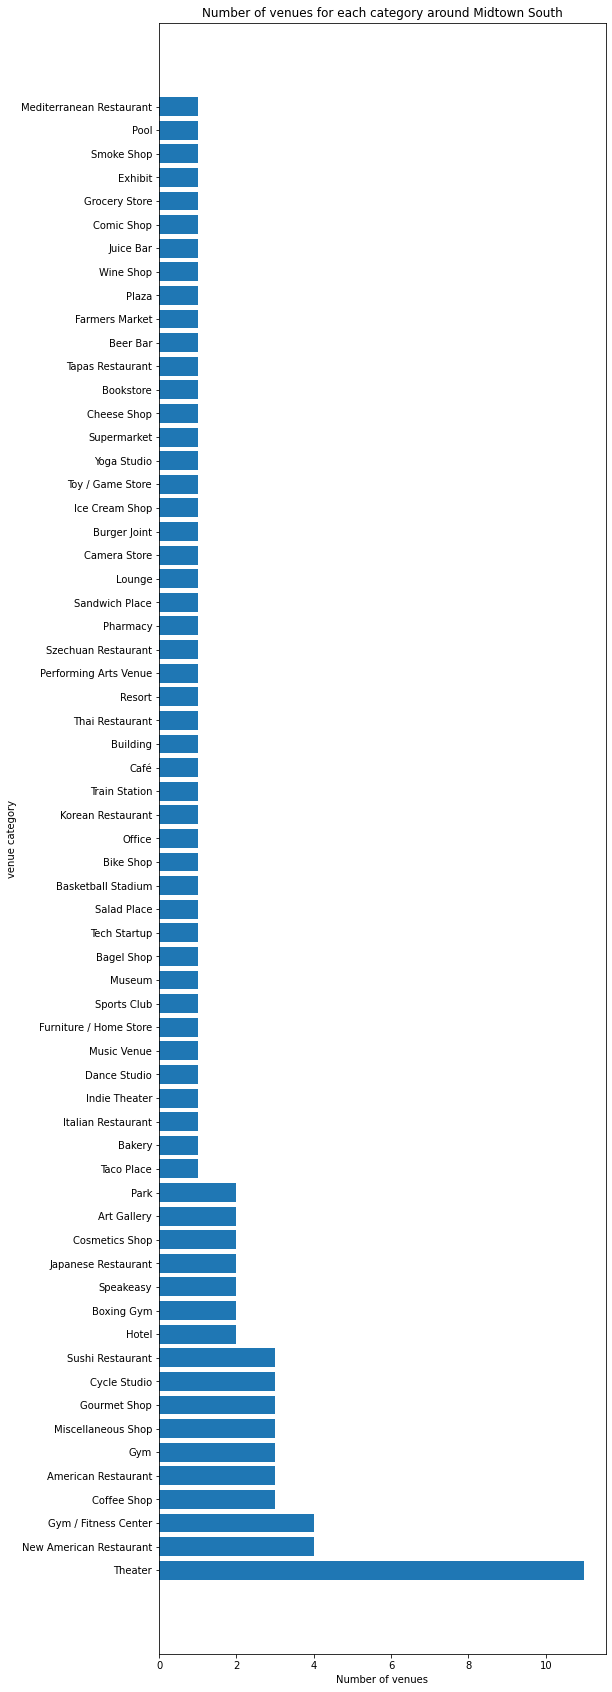

In [131]:
# Plot the number of venues of each category
f,ax = plt.subplots(figsize=(8,30))
plt.barh(midtown_south_venues['venue category'],
midtown_south_venues['frequency'])

plt.title('Number of venues for each category around Midtown South')
plt.ylabel('venue category')
plt.xlabel('Number of venues')
plt.show()

The bar chart illustrates the various venues in and around Midtown South. Although most of the venues are related to theatre, there are also plenty of other venues that would be useful for tourists. Along with the train station, we can notice the presence of restaurants of different cuisines including America, Mediterranean, Korean, Japanese, Italian to name a few. 
The locality also has a supermarket and a pharmacy enabling tenants to buy certain essentials during their New York stay.. 


#Results And Discussion:


* Most of the top-18 tourist attractions in New York are located within Manhattan.
* Since a few of them are present in the north side and the rest are in the middle and south, the centre of Manhattan would be an ideal location to start a hotel service.
* A good number of  facilities such as bus-stations, train-stations and restaurants could be found in the vicinity of Midtown South hence making it a recommended location for the hotel service.
* Property prices are expected to be over $3 million.
* On exploring further, a number of venues could be found near Midtown South.
* Although most of the venues are for theatre, the locality also has plenty of restaurants serving a wide variety of cuisines from different parts of the world. Along with this, there are also cafes, supermarkets, pharmacies and other essential stores nearby.
*Other potential neighborhoods could be  Murray Hill and the Upper West Side of Manhattan.








#Conclusion:


To conclude, a compelling region to start this budget friendly hotel service would be Midtown South due to its proximity to amenities such as bus-stations, train-stations and restaurants. The presence of these facilities around the neighborhood would mean that the hotel need not provide them explicitly to the visitors and hence a major portion of the cost which incorporates meals, shuttle service and part of customer service( since there are no in-person interaction with the customers ) can be slashed off which in turn would mean providing stay at a lower cost for the tourists.
